# Medidas de tendencia central

### Media = $$ \frac{1}{N} \sum_{i=1}^N x_i  $$ 

### Mediana(impar) = $$ x_{(n+1)/2}^{\text{ordered}} $$

### Mediana(par) = $$ \frac{x_{n/2}^{\text{ordered}} + x_{n/2+1}^{\text{ordered}}}{2} $$

### Moda = $$ x_k $$ donde $$ \text{Freq}(x_k) = \max{(\text{Freq}(x_i))} $$ 

continuamos con el dataset https://www.kaggle.com/lepchenkov/usedcarscatalog

In [2]:
import pandas as pd 

df = pd.read_csv('./../database/cars.csv')
df.head()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
0,Subaru,Outback,automatic,silver,190000,2010,gasoline,False,gasoline,2.5,...,True,True,True,False,True,False,True,True,True,16
1,Subaru,Outback,automatic,blue,290000,2002,gasoline,False,gasoline,3.0,...,True,False,False,True,True,False,False,False,True,83
2,Subaru,Forester,automatic,red,402000,2001,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,True,True,151
3,Subaru,Impreza,mechanical,blue,10000,1999,gasoline,False,gasoline,3.0,...,False,False,False,False,False,False,False,False,False,86
4,Subaru,Legacy,automatic,black,280000,2001,gasoline,False,gasoline,2.5,...,True,False,True,True,False,False,False,False,True,7


inspeccionemos el atributo de `price_usd` **(variable numérica continua)** de los autos listados en el dataset:

In [3]:
df.columns

Index(['manufacturer_name', 'model_name', 'transmission', 'color',
       'odometer_value', 'year_produced', 'engine_fuel', 'engine_has_gas',
       'engine_type', 'engine_capacity', 'body_type', 'has_warranty', 'state',
       'drivetrain', 'price_usd', 'is_exchangeable', 'location_region',
       'number_of_photos', 'up_counter', 'feature_0', 'feature_1', 'feature_2',
       'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7',
       'feature_8', 'feature_9', 'duration_listed'],
      dtype='object')

In [4]:
df[['price_usd']]

,price_usd
0,10900.00
1,5000.00
2,2800.00
3,9999.00
4,2134.11
...,...
38526,2750.00
38527,4800.00
38528,4300.00
38529,4000.00


In [5]:
df['price_usd'].mean()

6639.971021255613

In [6]:
df['price_usd'].median()

4800.0

<AxesSubplot:ylabel='Frequency'>

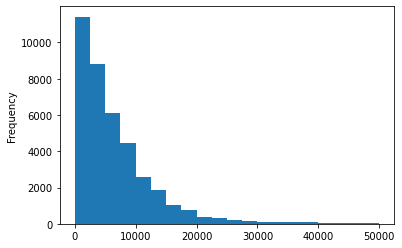

In [7]:
df['price_usd'].plot.hist(bins=20) #bins son los intervalos o segmentaciones

resulta más interesante analizar los precios por marcas: 

* **pro tip:** usar seaborn: https://seaborn.pydata.org/tutorial/distributions.html

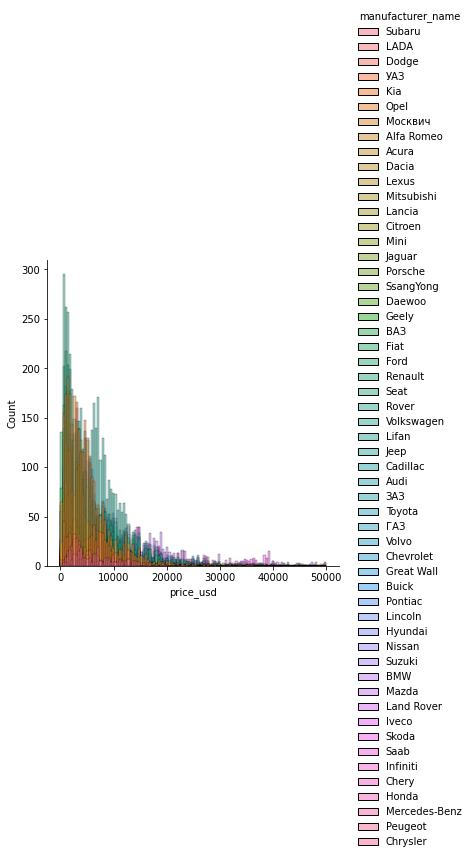

In [8]:
import seaborn as sns

sns.displot(df, x = 'price_usd', hue = 'manufacturer_name') #hue es una variable categorica y genera un histogramasegn el manufacturer_name

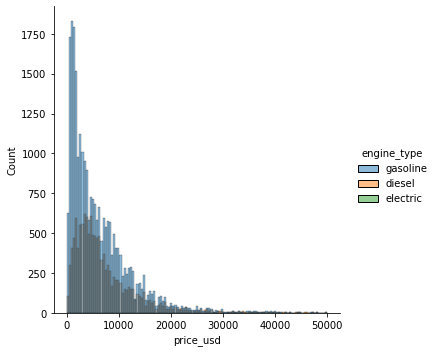

In [9]:
sns.displot(df, x="price_usd", hue="engine_type") # engine type es nuestra categoriaa ahora

el histograma anterior es muy dificil de analizar, ¿donde están los autos eléctricos?

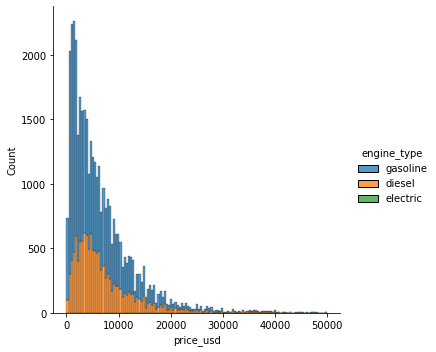

In [10]:
sns.displot(df, x='price_usd', hue = 'engine_type', multiple='stack')

In [11]:
df.groupby('engine_type').count()

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_capacity,body_type,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
engine_type,,,,,,,,,,,,,,,,,,,,,
diesel,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874,...,12874,12874,12874,12874,12874,12874,12874,12874,12874,12874
electric,10,10,10,10,10,10,10,10,0,10,...,10,10,10,10,10,10,10,10,10,10
gasoline,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647,...,25647,25647,25647,25647,25647,25647,25647,25647,25647,25647


**RETO:** Inspeccionemos precios de una marca y modelo particular !



<AxesSubplot:xlabel='price_usd', ylabel='Count'>

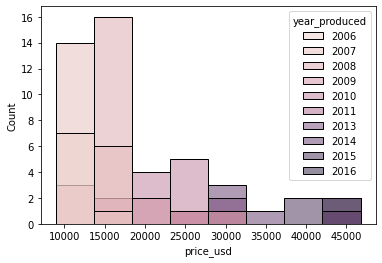

In [12]:
Q7_df = df[(df['manufacturer_name']=='Audi') & (df['model_name']=='Q7')]
sns.histplot(Q7_df, x='price_usd', hue = 'year_produced') #hue es la variable categoria con la que agrupa 

#  Reto

In [13]:
df.columns

Index(['manufacturer_name', 'model_name', 'transmission', 'color',
       'odometer_value', 'year_produced', 'engine_fuel', 'engine_has_gas',
       'engine_type', 'engine_capacity', 'body_type', 'has_warranty', 'state',
       'drivetrain', 'price_usd', 'is_exchangeable', 'location_region',
       'number_of_photos', 'up_counter', 'feature_0', 'feature_1', 'feature_2',
       'feature_3', 'feature_4', 'feature_5', 'feature_6', 'feature_7',
       'feature_8', 'feature_9', 'duration_listed'],
      dtype='object')

In [14]:
df.groupby(['color']).count()

,manufacturer_name,model_name,transmission,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,body_type,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
color,,,,,,,,,,,,,,,,,,,,,
black,7705,7705,7705,7705,7705,7705,7705,7705,7703,7705,...,7705,7705,7705,7705,7705,7705,7705,7705,7705,7705
blue,5802,5802,5802,5802,5802,5802,5802,5802,5801,5802,...,5802,5802,5802,5802,5802,5802,5802,5802,5802,5802
brown,886,886,886,886,886,886,886,886,886,886,...,886,886,886,886,886,886,886,886,886,886
green,2760,2760,2760,2760,2760,2760,2760,2760,2760,2760,...,2760,2760,2760,2760,2760,2760,2760,2760,2760,2760
grey,3751,3751,3751,3751,3751,3751,3751,3751,3751,3751,...,3751,3751,3751,3751,3751,3751,3751,3751,3751,3751
orange,184,184,184,184,184,184,184,184,182,184,...,184,184,184,184,184,184,184,184,184,184
other,2688,2688,2688,2688,2688,2688,2688,2688,2687,2688,...,2688,2688,2688,2688,2688,2688,2688,2688,2688,2688
red,2925,2925,2925,2925,2925,2925,2925,2925,2925,2925,...,2925,2925,2925,2925,2925,2925,2925,2925,2925,2925
silver,6852,6852,6852,6852,6852,6852,6852,6852,6851,6852,...,6852,6852,6852,6852,6852,6852,6852,6852,6852,6852


In [15]:
df.shape

(38531, 30)

In [16]:
df[['year_produced','manufacturer_name','model_name']]

,year_produced,manufacturer_name,model_name
0,2010,Subaru,Outback
1,2002,Subaru,Outback
2,2001,Subaru,Forester
3,1999,Subaru,Impreza
4,2001,Subaru,Legacy
...,...,...,...
38526,2000,Chrysler,300
38527,2004,Chrysler,PT Cruiser
38528,2000,Chrysler,300
38529,2001,Chrysler,PT Cruiser


In [17]:
df['color'].value_counts()

black     7705
silver    6852
blue      5802
white     4212
grey      3751
red       2925
green     2760
other     2688
brown      886
violet     463
yellow     303
orange     184
Name: color, dtype: int64

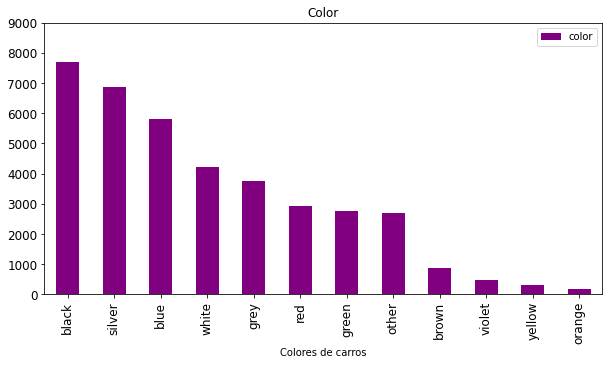

In [18]:
axis = df['color'].value_counts().plot.bar(
    color ='purple', 
    figsize=(10,5), 
    title='Color', 
    xlabel='Colores de carros',
    ylim=(0,9000),
    legend=True, fontsize=12, sort_columns=True)
#axis.set_ylim(0,8000)


In [19]:
df['model_name'].value_counts()

Passat    1423
Astra      751
Golf       707
A6         687
Mondeo     637
          ... 
C1500        1
Alero        1
Impala       1
360          1
Aspen        1
Name: model_name, Length: 1118, dtype: int64

In [20]:
nissan_df=df.query('manufacturer_name=="Nissan" and model_name=="Primera" and year_produced>=2000')
nissan_df

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
25910,Nissan,Primera,mechanical,black,255000,2002,diesel,False,diesel,2.2,...,True,False,False,False,False,False,False,False,True,51
25925,Nissan,Primera,mechanical,black,330000,2004,diesel,False,diesel,1.9,...,True,True,False,False,False,True,True,True,True,11
25927,Nissan,Primera,mechanical,silver,280000,2002,diesel,False,diesel,2.2,...,True,True,False,False,True,True,False,True,False,2
25984,Nissan,Primera,mechanical,other,350000,2004,diesel,False,diesel,1.9,...,True,False,False,False,False,False,False,False,True,112
25985,Nissan,Primera,mechanical,red,285000,2002,gasoline,False,gasoline,2.0,...,False,False,False,True,True,False,False,False,True,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27205,Nissan,Primera,mechanical,green,245000,2003,gasoline,False,gasoline,1.8,...,True,False,True,False,False,False,False,False,True,155
27213,Nissan,Primera,mechanical,silver,327000,2001,diesel,False,diesel,1.9,...,True,False,False,False,False,False,False,False,False,160
27220,Nissan,Primera,mechanical,silver,204839,2002,diesel,False,diesel,2.2,...,True,False,False,False,True,False,True,True,True,169
27229,Nissan,Primera,mechanical,silver,261000,2002,diesel,False,diesel,2.2,...,True,False,True,False,False,False,False,False,False,179


In [21]:
'Ranger' in df['model_name'].value_counts()

True

In [22]:
manufacturer_name = list(set(df['manufacturer_name'].values))
for i in manufacturer_name:
    print(i, end=", ")

Volvo, Kia, Volkswagen, Dacia, Lancia, Acura, ВАЗ, Renault, Chevrolet, Land Rover, Saab, Toyota, Peugeot, Daewoo, Geely, Audi, Honda, Opel, LADA, ГАЗ, Great Wall, Iveco, Buick, Porsche, Dodge, Mitsubishi, Subaru, Ford, Seat, Москвич, Pontiac, Mazda, Mercedes-Benz, ЗАЗ, Infiniti, Cadillac, Jeep, Chrysler, Jaguar, Suzuki, Chery, Lexus, Lincoln, Hyundai, Citroen, Alfa Romeo, УАЗ, Rover, SsangYong, Nissan, Mini, BMW, Skoda, Fiat, Lifan, 

In [23]:
df[(df['model_name']=='Ranger')]

,manufacturer_name,model_name,transmission,color,odometer_value,year_produced,engine_fuel,engine_has_gas,engine_type,engine_capacity,...,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,duration_listed
9698,Ford,Ranger,mechanical,white,109435,2011,gasoline,False,gasoline,2.3,...,True,False,False,False,False,False,False,False,False,81
10324,Ford,Ranger,mechanical,silver,267000,2006,diesel,False,diesel,2.5,...,True,True,False,False,False,False,False,False,True,11
11214,Ford,Ranger,automatic,red,160000,1991,gasoline,False,gasoline,4.0,...,False,False,False,False,False,False,False,False,False,664
11272,Ford,Ranger,mechanical,blue,250000,2003,diesel,False,diesel,2.5,...,True,False,False,False,False,False,False,False,True,33
11369,Ford,Ranger,automatic,black,0,2019,diesel,False,diesel,2.0,...,True,False,True,True,True,False,True,True,True,185
11764,Ford,Ranger,mechanical,white,281635,2000,gasoline,False,gasoline,2.5,...,True,False,False,False,False,False,False,False,False,87
11930,Ford,Ranger,mechanical,black,28968,2007,gasoline,False,gasoline,3.0,...,True,False,False,False,False,False,False,False,False,136


In [24]:
Ford = df.query('manufacturer_name == "Ford"')
Ford[(Ford['model_name']=='Ranger')][['manufacturer_name', 'model_name', 'year_produced', 'price_usd']].sort_values(by=['year_produced', 'price_usd'])

,manufacturer_name,model_name,year_produced,price_usd
11214,Ford,Ranger,1991,2500.0
11764,Ford,Ranger,2000,5660.0
11272,Ford,Ranger,2003,7900.0
10324,Ford,Ranger,2006,6350.0
11930,Ford,Ranger,2007,12500.0
9698,Ford,Ranger,2011,12500.0
11369,Ford,Ranger,2019,33000.0


In [25]:
df[
    (df.color=="black") & (df.manufacturer_name=='Ford') & (df.year_produced>2016)
    ][[
        'color','year_produced', 
        'manufacturer_name', 
        'model_name', 'price_usd'
        ]].sort_values(by=['year_produced'])

,color,year_produced,manufacturer_name,model_name,price_usd
12033,black,2017,Ford,Focus,13700.0
11225,black,2017,Ford,Focus,18000.0
9592,black,2017,Ford,Focus,13390.0
10023,black,2017,Ford,Escape,17450.0
11081,black,2017,Ford,Focus,10400.0
11046,black,2017,Ford,Escape,9999.0
11840,black,2017,Ford,Fusion,16000.0
11001,black,2018,Ford,Escape,6000.0
11000,black,2018,Ford,Escape,7000.0
9564,black,2018,Ford,Focus,11900.0


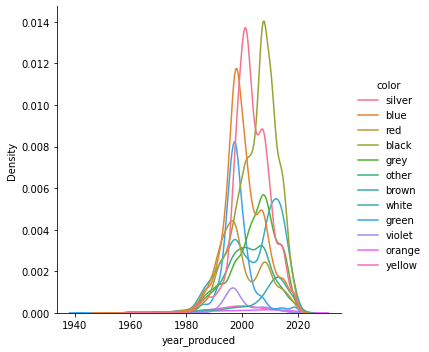

In [26]:
import seaborn as sns

sns.displot(df, x = 'year_produced', hue = 'color', kind="kde")

se produjeron mas carros en el año 1990 a el 2010


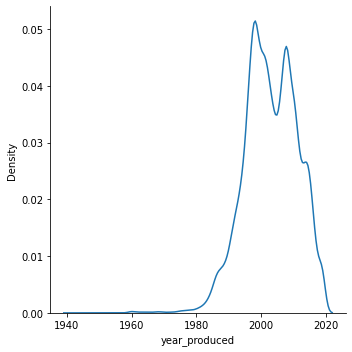

In [27]:
sns.displot(df, x = 'year_produced', kind="kde")
print("se produjeron mas carros en el año 1990 a el 2010")

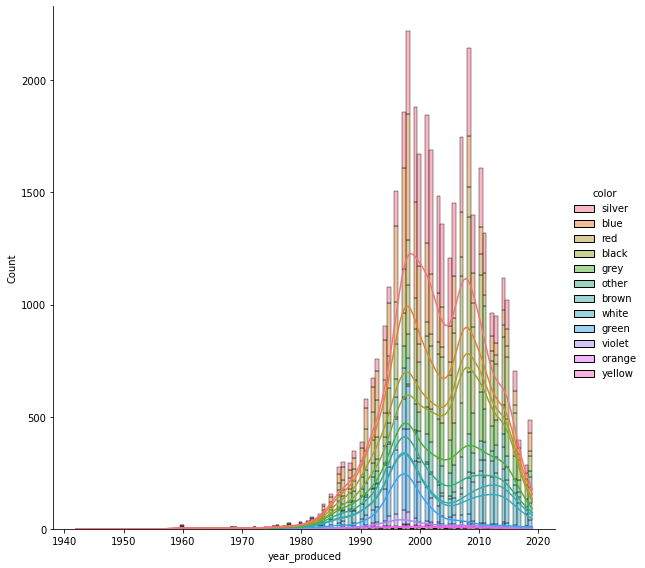

In [31]:
sns.displot(df, x='year_produced', hue = 'color', multiple='stack', kde=True, height=8)

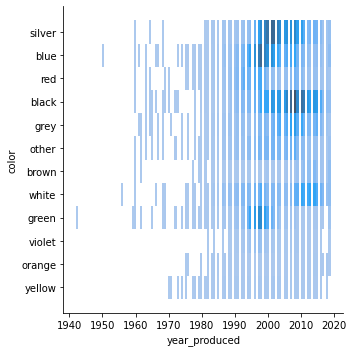

In [29]:
sns.displot(df, x='year_produced', y='color')

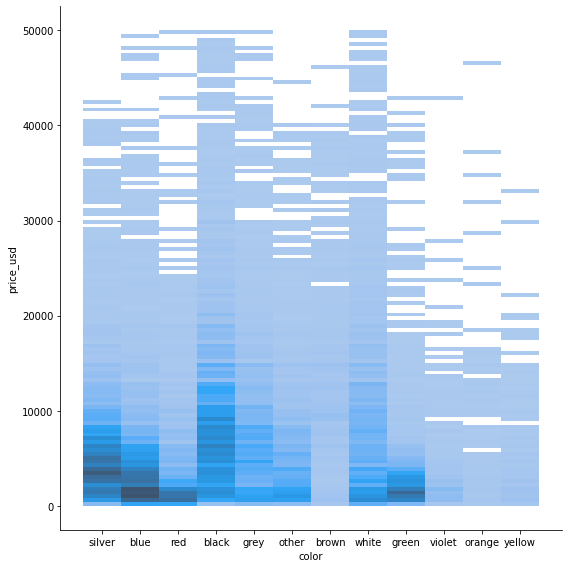

In [32]:
sns.displot(df, x='color', y='price_usd', height=8)

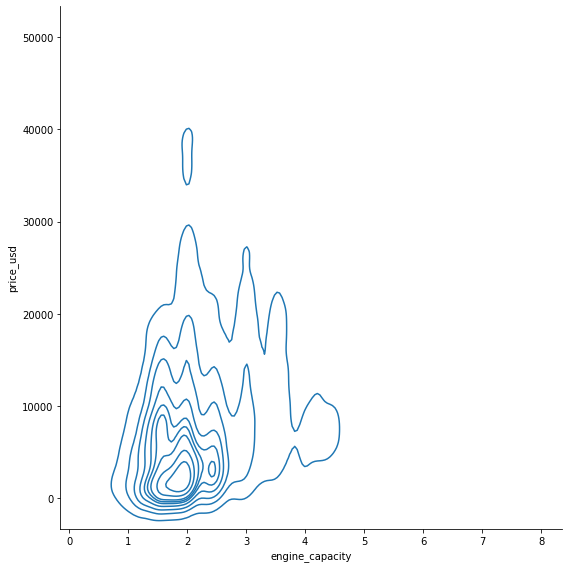

In [34]:
sns.displot(df, x='engine_capacity', y='price_usd', kind='kde',height=8)

<AxesSubplot:xlabel='color', ylabel='price_usd'>

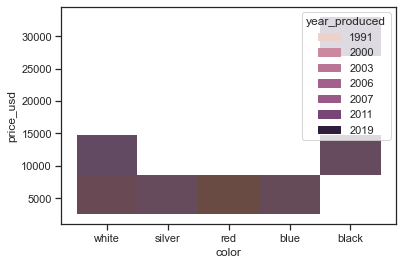

In [57]:
ranger_df = df[(df['manufacturer_name']=='Ford') & (df['model_name']==('Ranger'))]
sns.histplot(ranger_df, x='color',y = 'price_usd', hue = 'year_produced', color= 'yellow')

<AxesSubplot:xlabel='color', ylabel='price_usd'>

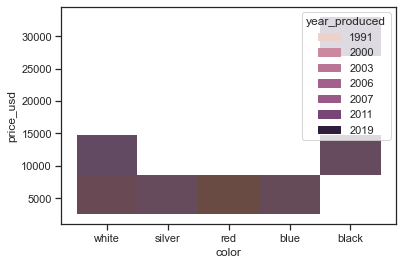

In [59]:
ranger_df = df[(df['manufacturer_name']=='Ford') & (df['model_name']==('Ranger'))]
sns.histplot(ranger_df, x='color',y = 'price_usd', hue = 'year_produced', color= 'yellow', shrink=.2) #hue es la variable categoria con la que agrupa 

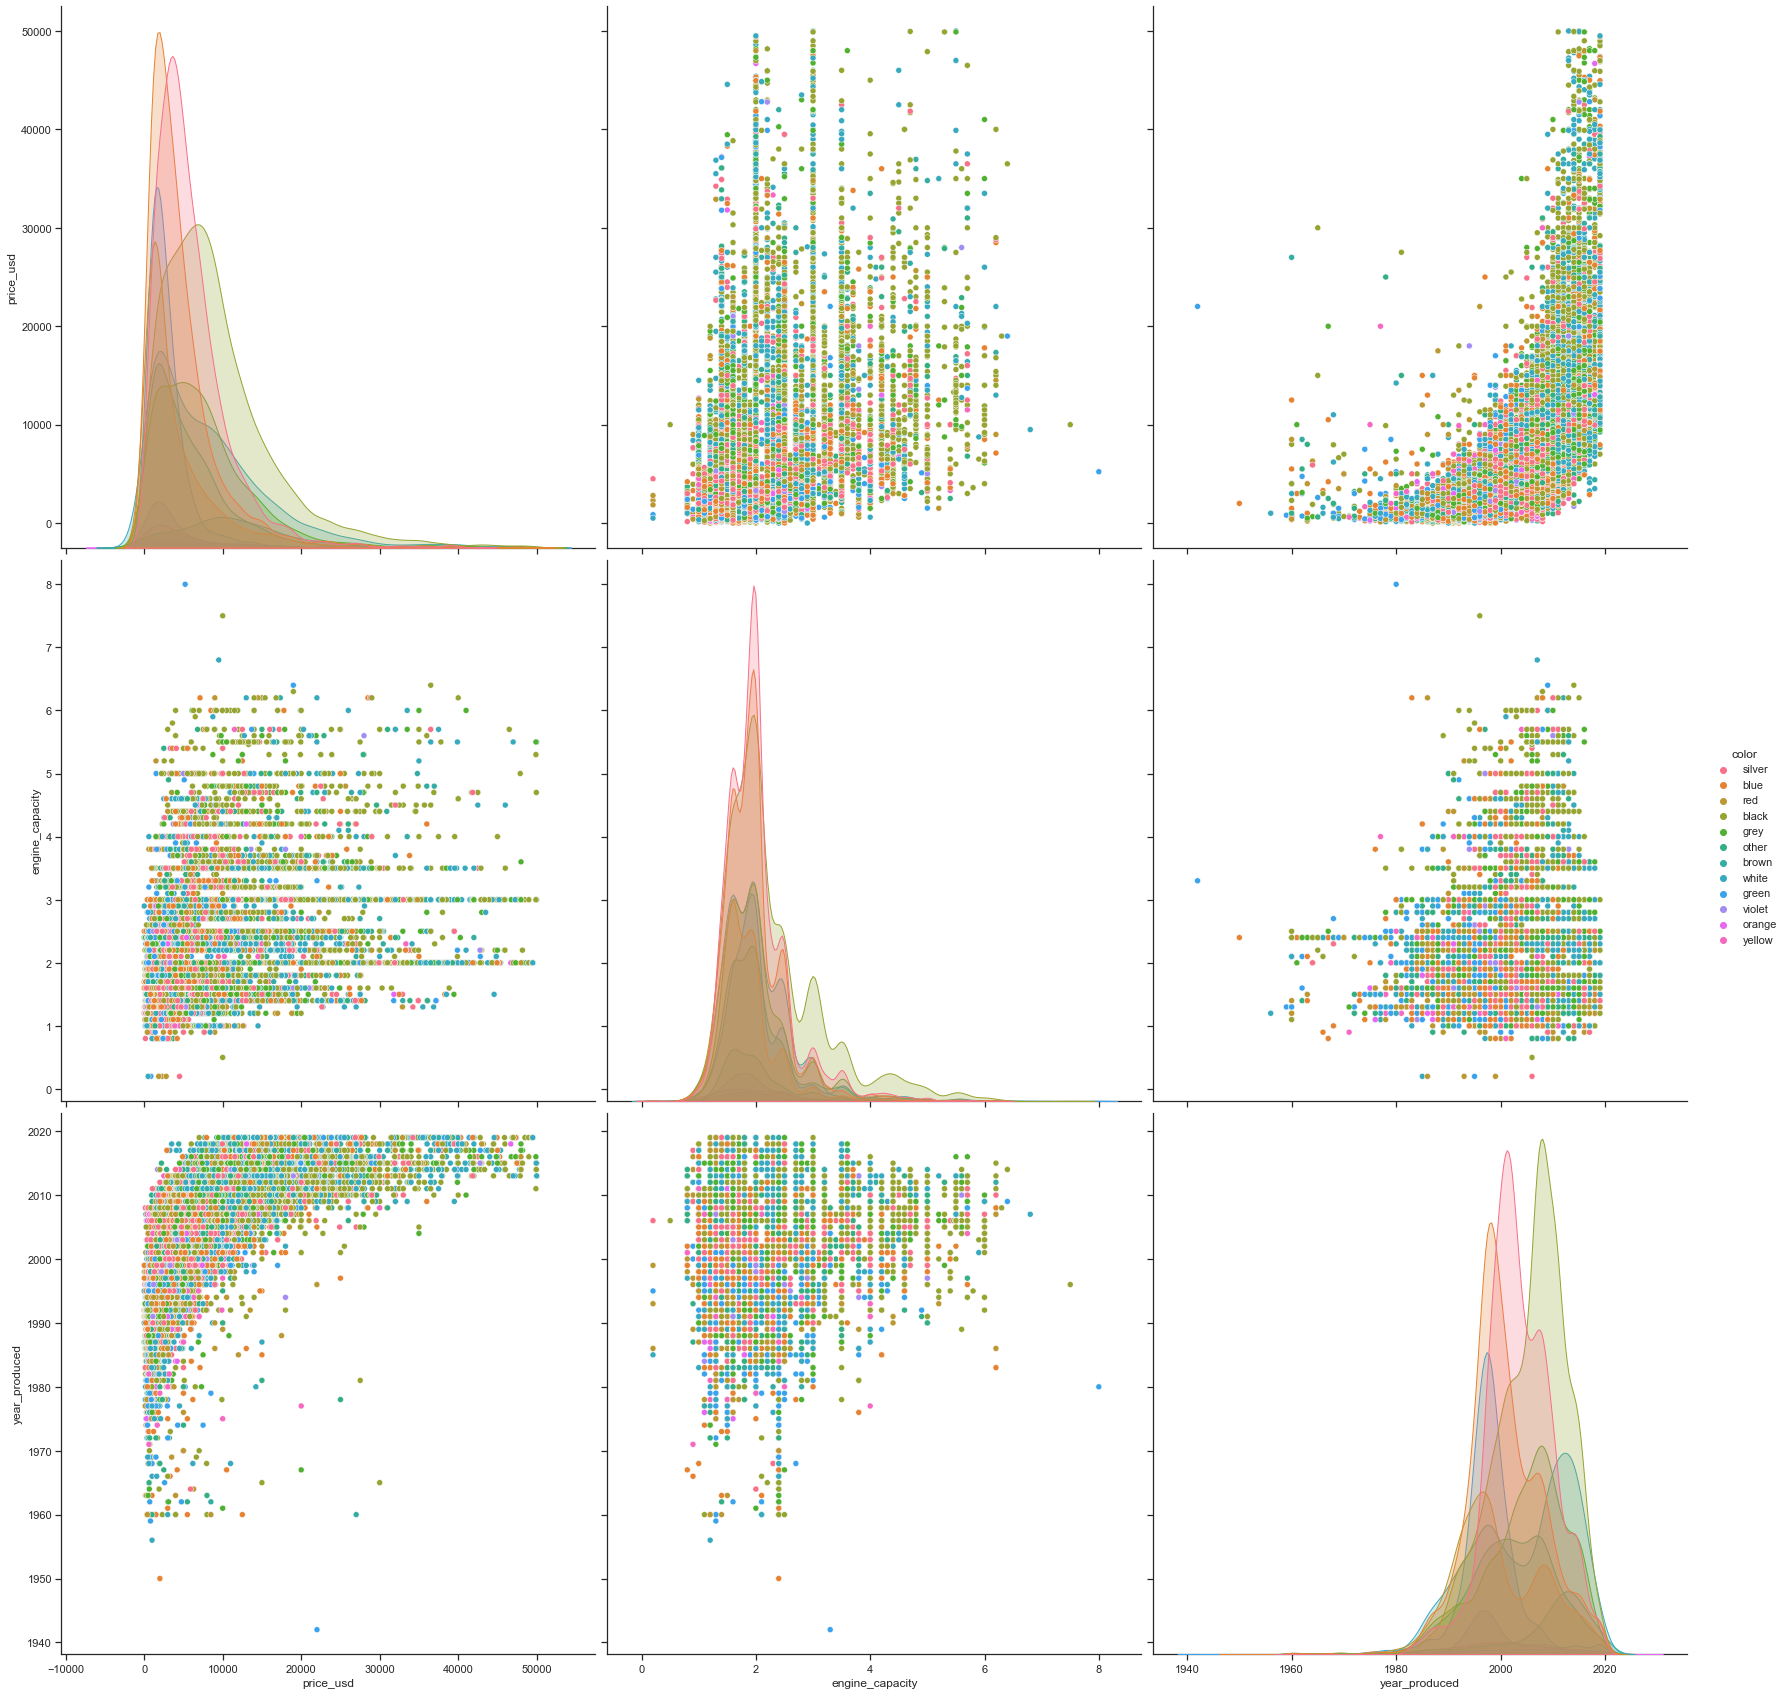

In [47]:
import seaborn as sns
sns.set(style="ticks", color_codes=True)
sns.pairplot(df,vars = ['price_usd', 'engine_capacity','year_produced'], hue="color", height=8)
